# Metode Numerik

In [2]:
from __future__ import print_function

%matplotlib inline
import numpy
import matplotlib.pyplot as plt

## Sumber Kesalahan

Kesalahan dapat berasal dari banyak sumber saat menggunakan menerapkan metode numerik:

- Model / Data Kesalahan
- Kesalahan Diskretisasi
- Kesalahan Konvergensi
- Kesalahan Floating Point

Tujuan: Kategorikan dan memahami setiap jenis kesalahan dan mengeksplorasi beberapa pendekatan sederhana untuk menganalisis kesalahan.

## Model dan Kesalahan Data

Kesalahan dalam formulasi fundamental

- Lotka-Volterra - kelinci fraksional, tidak ada kepunahan, dll.
- Kesalahan Data - Ketidaktepatan dalam pengukuran atau ketidakpastian dalam parameter

Unfortunatley kita tidak dapat mengontrol model dan kesalahan data secara langsung tetapi kita dapat menggunakan metode yang mungkin lebih kuat dalam arti awal jenis kesalahan.

## Diskritisasi atau Kesalahan Pemotongan

Kesalahan yang timbul dari mendekati fungsi dengan fungsi yang lebih sederhana, misalnya Menggunakan perkiraan  $sin(x)≈x $ ketika $|x|≈0 $.

## Kesalahan Floating Point

Kesalahan yang timbul dari mendekati angka riil dengan angka presisi terbatas dan aritmatika.

## Kesalahan Konvergensi

Dalam beberapa kasus algoritma dikembangkan yang akan mengambil pendekatan saat ini dan kemudian menemukan peningkatan pada perkiraan saat ini. Dalam beberapa kasus kesalahan yang dihasilkan dalam setiap langkah indivudal dapat mengumpulkan atau menjadi diperbesar setelah mengulangi algoritma beberapa kali.

## Definisi Dasar

Sebelum menjelajahi berbagai jenis kesalahan, penting untuk terlebih dahulu menentukan cara kesalahan diukur. Mengingat nilai sebenarnya dari fungsi  f  dan solusi aproksimasi  F  didefinisikan:

Kesalahan mutlak: $$e = |f-F|$$
<br> Kesalahan relatif: $$r = \frac{e}{|f|} = \frac{f-F}{|f|} $$

## Presisi Desimal

Definisi kesalahan relatif ini memberikan perkiraan yang nyaman untuk jumlah digit presisi desimal  $p$  
<br>kesalahan relatif  $r$, presisi $p$ adalah bilangan bulat terbesar sehingga  $ r \geq 5 x 10^{-p} $

<br>example
- if $r = 0.001 < 5×10^{-3}$ has $p = 3$ significant digits
- if $r = 0.006 < 5×10^{−2}$ has $p = 2$ significant digits
<br>(because this error would cause rounding up)

## Contoh

ambil $$f = e^1, \ F = 2.71$$ 

In [6]:
f = numpy.exp(1.)
F = 2.71
e = numpy.abs(f - F)
r = e/numpy.abs(f)
p = int(-numpy.log10(r/5.))
print('f = {}'.format(f))
print('F = {}'.format(F))

print('Kesalahan Absolut : {}'.format(e))
print('Kesalahan Relatif : {}'.format(r))
print('Presisi Desimal   : {}'.format(p))

f = 2.718281828459045
F = 2.71
Kesalahan Absolut : 0.008281828459045126
Kesalahan Relatif : 0.0030467144253912685
Presisi Desimal   : 3


## Notasi Big-O

Dalam banyak situasi, perkiraan akan memiliki parameter yang terkait dengannya, dan nilai parameter sering dipilih untuk memastikan bahwa kesalahan masuk akal dalam situasi tertentu. Dalam keadaan seperti itu kita sering ingin tahu dampaknya pada kesalahan jika kita mengubah nilai parameter. Hal ini mengarah pada definisi notasi Big-O: $$f(x)=O(g(x)) \ \ as   \ \ x→a$$
jika dan hanya jika
$$|f(x)|≤M|g(x)| \ \ as\ \ |x−a|<δ \ \ where\ \ M,a>0.$$
 
Dalam prakteknya kita menggunakan notasi Big-O untuk mengatakan sesuatu tentang bagaimana istilah-istilah yang mungkin telah kita tinggalkan dari seri mungkin berperilaku. Kami melihat contoh sebelumnya dengan perkiraan seri Taylor.

### contoh
diberikan $f(x)=sinx$ dengan $x_0=0$, maka polinomial Taylor (Pemotongan deret Taylor) dari $f(x)$ diperluas di sekitar $x_0=0$ <br>is
$$T_N(x)= \sum_{n=0}^{N}(−1)^n \frac{x^{2n+1}}{(2n+1)!}$$

Untuk $N=2$, kita dapat tuliskan $f(x)$ sebagai<br>
<br>$$f(x)= x−\frac{x^3}{6}+\frac{x^5}{120}+O(x^7)$$

Ini menjadi lebih berguna ketika kita melihat ini menggunakan $x=x_0+ \Delta x$ :
$$f(x)=\Delta x − \frac{\Delta x^3}{6} + \frac{\Delta x^5}{120} + O(\Delta x^7)$$
 


#### Kita juga dapat mengembangkan aturan untuk propagasi kesalahan berdasarkan notasi Big-O:

Secara umum, ada dua teorema yang tidak memerlukan bukti dan tahan ketika nilai x besar:

Ambil

\begin{align}
f(x) &= p(x) + O(x^n) \\
g(x) &= q(x) + O(x^m) \\
k &= max(n,m)
\end{align}
 
maka
$$f+g=p+q+O(x^k)$$
 
dan
$$f \cdot g = p \cdot q + pO(x^m) + qO(x^n) + O(x^{n+m}) = p \cdot q + O(x^{n+m})$$
 
Di sisi lain, jika kita tertarik pada nilai-nilai kecil x, katakanlah $\Delta x$, ekspresi di atas dapat dimodifikasi sebagai berikut:

\begin{align}
f(\Delta x) &= p(\Delta x)+O(\Delta x^n) \\
g(\Delta x) &= q(\Delta x)+O(\Delta x^m) \\
r &= min(n,m)
\end{align}
 
maka
$$f+g=p+q+O(\Delta x^r)$$
 
dan
\begin{align}
    f \cdot g &= p \cdot q + p \cdot O(\Delta x^m) + q \cdot O(\Delta x^n)+O(\Delta x^{n+m}) \\ &=p \cdot q + O(\Delta x^r)
\end{align}


__Catatan:__ Dalam hal ini kita mengira bahwa setidaknya polinomial dengan  k=max(n,m)  memiliki bentuk sebagai berikut: 
$$p(\Delta x) = 1 + p_1\Delta x + p_2\Delta x2 + …$$
atau
$$q(\Delta x) = 1 + q_1\Delta x + q_2\Delta x2 + …$$

sehingga terdapat suku $\mathcal{O}(1)$ yang menjamin keberadaan dari  $\mathcal{O}(\Delta x^r)$  dalam hasil final.




Untuk mendapatkan rasa mengapa kita paling peduli tentang kekuatan pada $\Delta x$ ketika mempertimbangkan konvergensi angka berikut menunjukkan bagaimana kekuatan yang berbeda pada tingkat konvergensi dapat mempengaruhi seberapa cepat kita bertemu dengan solusi kami. Perhatikan bahwa di sini kita merencanakan data yang sama dua cara yang berbeda. Merencanakan kesalahan sebagai fungsi $\Delta x$ adalah cara umum untuk menunjukkan bahwa metode numerik melakukan apa yang kita harapkan dan menunjukkan perilaku konvergensi yang benar. Karena kesalahan bisa menjadi kecil dengan cepat sangat umum untuk merencanakan plot semacam ini pada skala log-log untuk dengan mudah memvisualisasikan hasilnya. Perhatikan bahwa jika metode benar-benar dari $n$ bahwa mereka akan menjadi fungsi linier di ruang log-log dengan kemiringan $n$.

Perilaku kesalahan sebagai fungsi $\Delta x$

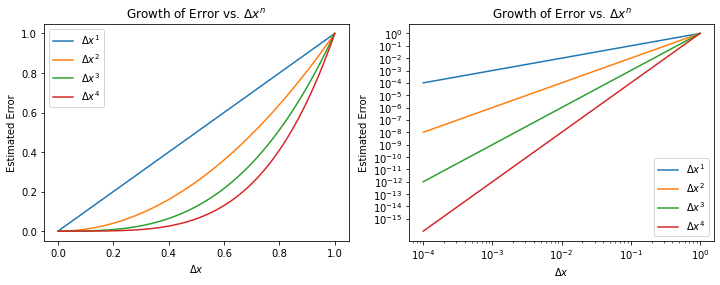

In [7]:
dx = numpy.linspace(1.0, 1e-4, 100)

fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2.0)
axes = []
axes.append(fig.add_subplot(1, 2, 1))
axes.append(fig.add_subplot(1, 2, 2))

for n in range(1, 5):
    axes[0].plot(dx, dx**n, label="$\Delta x^%s$" % n)
    axes[1].loglog(dx, dx**n, label="$\Delta x^%s$" % n)

axes[0].legend(loc=2)
axes[1].set_xticks([10.0**(-n) for n in range(5)])
axes[1].set_yticks([10.0**(-n) for n in range(16)])
axes[1].legend(loc=4)
for n in range(2):
    axes[n].set_title("Growth of Error vs. $\Delta x^n$")
    axes[n].set_xlabel("$\Delta x$")
    axes[n].set_ylabel("Estimated Error")

plt.show()